In [1]:
import pickle
import pandas as pd
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(['science', 'grid', 'no-latex'])
# pandas style decimal places
pd.set_option('display.precision', 2)

In [2]:
topic_50_path = '/raid/work/username/final_results/50topics/'
topic_200_path = '/raid/work/username/final_results/200topics/'
data_list = ["20ng", "amazon_polarity", "ag_news", "govreport-summarization", "imdb", "rotten_tomatoes", "yelp"]

In [3]:
df = pd.DataFrame(columns=['dataset', 'syconntm_syn_tc', 'syconntm_syn_td', 'syconntm_syn_tq', 'syconntm_sp', 'syconntm_tc', 'syconntm_td', 'syconntm_tq', 'lda_tc', 'lda_td', 'lda_tq', 'dvae_tc', 'dvae_td', 'dvae_tq', 'etm_tc', 'etm_td', 'etm_tq', 'etm_dirichlet_tc', 'etm_dirichlet_td', 'etm_dirichlet_tq'])

df_200 = pd.DataFrame(columns=['dataset', 'syconntm_syn_tc', 'syconntm_syn_td', 'syconntm_syn_tq', 'syconntm_sp', 'syconntm_tc', 'syconntm_td', 'syconntm_tq', 'lda_tc', 'lda_td', 'lda_tq', 'dvae_tc', 'dvae_td', 'dvae_tq', 'etm_tc', 'etm_td', 'etm_tq', 'etm_dirichlet_tc', 'etm_dirichlet_td', 'etm_dirichlet_tq'])

In [4]:
for data in data_list:
    lda_path = f"{topic_50_path}{data}/lda/preprocessed/"
    dvae_path = f"{topic_50_path}{data}/dvae/preprocessed/"
    etm_path = f"{topic_50_path}{data}/etm/preprocessed/"
    etm_dir_path = f"{topic_50_path}{data}/etm_dirichlet/preprocessed/"
    syconntm_path = f"{topic_50_path}{data}/syconntm/symmetric/5/0.5/not_preprocessed/"
    
    lda_path_200 = f"{topic_200_path}{data}/lda/preprocessed/"
    dvae_path_200 = f"{topic_200_path}{data}/dvae/preprocessed/"
    etm_path_200 = f"{topic_200_path}{data}/etm/preprocessed/"
    etm_dir_path_200 = f"{topic_200_path}{data}/etm_dirichlet/preprocessed/"
    syconntm_path_200 = f"{topic_200_path}{data}/syconntm/symmetric/5/0.5/not_preprocessed/"
    
    logger_lda = pickle.load(open(lda_path + "logger.pkl", "rb"))
    logger_dvae = pickle.load(open(dvae_path + "logger.pkl", "rb"))
    logger_etm = pickle.load(open(etm_path + "logger.pkl", "rb"))
    logger_etm_dir = pickle.load(open(etm_dir_path + "logger.pkl", "rb"))
    logger_syconntm = pickle.load(open(syconntm_path + "logger.pkl", "rb"))
    
    logger_lda_200 = pickle.load(open(lda_path_200 + "logger.pkl", "rb"))
    logger_dvae_200 = pickle.load(open(dvae_path_200 + "logger.pkl", "rb"))
    logger_etm_200 = pickle.load(open(etm_path_200 + "logger.pkl", "rb"))
    logger_etm_dir_200 = pickle.load(open(etm_dir_path_200 + "logger.pkl", "rb"))
    logger_syconntm_200 = pickle.load(open(syconntm_path_200 + "logger.pkl", "rb"))
    
    new_df = pd.DataFrame([{'dataset': data, 'syconntm_syn_tc': logger_syconntm['tq_syn']['coherence'], 'syconntm_syn_td': logger_syconntm['tq_syn']['topic_diversity'], 'syconntm_syn_tq': (logger_syconntm['tq_syn']['coherence'] * logger_syconntm['tq_syn']['topic_diversity']), 'syconntm_sp': logger_syconntm['tq_con']['semantic_purity']/100, 'syconntm_tc': logger_syconntm['tq_con']['coherence'], 'syconntm_td': logger_syconntm['tq_con']['topic_diversity'], 'syconntm_tq': (logger_syconntm['tq_con']['coherence'] * logger_syconntm['tq_con']['topic_diversity']), 'dvae_tc': logger_dvae['tq']['coherence'], 'dvae_td': logger_dvae['tq']['topic_diversity'], 'dvae_tq': (logger_dvae['tq']['coherence'] * logger_dvae['tq']['topic_diversity']), 'lda_tc': logger_lda['tq']['coherence'], 'lda_td': logger_lda['tq']['topic_diversity'], 'lda_tq': (logger_lda['tq']['coherence'] * logger_lda['tq']['topic_diversity']), 'etm_tc': logger_etm['tq']['coherence'], 'etm_td': logger_etm['tq']['topic_diversity'], 'etm_tq': (logger_etm['tq']['coherence'] * logger_etm['tq']['topic_diversity']), 'etm_dirichlet_tc': logger_etm_dir['tq']['coherence'], 'etm_dirichlet_td': logger_etm_dir['tq']['topic_diversity'], 'etm_dirichlet_tq': (logger_etm_dir['tq']['coherence'] * logger_etm_dir['tq']['topic_diversity'])}])
    df = pd.concat([df, new_df])
    
    new_df_200 = pd.DataFrame([{'dataset': data, 'syconntm_syn_tc': logger_syconntm_200['tq_syn']['coherence'], 'syconntm_syn_td': logger_syconntm_200['tq_syn']['topic_diversity'], 'syconntm_syn_tq': (logger_syconntm_200['tq_syn']['coherence'] * logger_syconntm_200['tq_syn']['topic_diversity']), 'syconntm_sp': logger_syconntm_200['tq_con']['semantic_purity']/100, 'syconntm_tc': logger_syconntm_200['tq_con']['coherence'], 'syconntm_td': logger_syconntm_200['tq_con']['topic_diversity'], 'syconntm_tq': (logger_syconntm_200['tq_con']['coherence'] * logger_syconntm_200['tq_con']['topic_diversity']), 'dvae_tc': logger_dvae_200['tq']['coherence'], 'dvae_td': logger_dvae_200['tq']['topic_diversity'], 'dvae_tq': (logger_dvae_200['tq']['coherence'] * logger_dvae_200['tq']['topic_diversity']), 'lda_tc': logger_lda_200['tq']['coherence'], 'lda_td': logger_lda_200['tq']['topic_diversity'], 'lda_tq': (logger_lda_200['tq']['coherence'] * logger_lda_200['tq']['topic_diversity']), 'etm_tc': logger_etm_200['tq']['coherence'], 'etm_td': logger_etm_200['tq']['topic_diversity'], 'etm_tq': (logger_etm_200['tq']['coherence'] * logger_etm_200['tq']['topic_diversity']), 'etm_dirichlet_tc': logger_etm_dir_200['tq']['coherence'], 'etm_dirichlet_td': logger_etm_dir_200['tq']['topic_diversity'], 'etm_dirichlet_tq': (logger_etm_dir_200['tq']['coherence'] * logger_etm_dir_200['tq']['topic_diversity'])}])
    df_200 = pd.concat([df_200, new_df_200])
    
    

In [5]:
df

,dataset,syconntm_syn_tc,syconntm_syn_td,syconntm_syn_tq,syconntm_sp,syconntm_tc,syconntm_td,syconntm_tq,lda_tc,lda_td,lda_tq,dvae_tc,dvae_td,dvae_tq,etm_tc,etm_td,etm_tq,etm_dirichlet_tc,etm_dirichlet_td,etm_dirichlet_tq
0,20ng,0.43,0.91,0.39,0.90,0.41,0.49,0.20,0.48,0.56,0.27,0.44,0.44,0.19,0.30,0.13,0.04,0.36,0.39,0.14
0,amazon_polarity,0.56,0.82,0.46,0.97,0.52,0.74,0.39,0.40,0.38,0.15,0.40,0.28,0.11,0.30,0.06,0.02,0.40,0.30,0.12
0,ag_news,0.59,1.00,0.59,0.88,0.41,0.07,0.03,0.44,0.18,0.08,0.35,0.17,0.06,0.26,0.10,0.03,0.36,0.17,0.06
0,govreport-summarization,0.54,0.96,0.52,0.99,0.47,0.67,0.31,0.54,0.59,0.32,0.57,0.60,0.35,0.35,0.34,0.12,0.60,0.66,0.40
0,imdb,0.40,0.75,0.30,0.95,0.46,0.69,0.32,0.41,0.52,0.21,0.41,0.43,0.18,0.30,0.49,0.15,0.41,0.50,0.20
0,rotten_tomatoes,0.48,0.90,0.43,1.00,0.57,0.12,0.07,0.30,0.04,0.01,0.31,0.04,0.01,0.31,0.04,0.01,0.31,0.04,0.01
0,yelp,0.54,0.89,0.48,0.96,0.52,0.75,0.39,0.48,0.60,0.29,0.45,0.42,0.19,0.35,0.12,0.04,0.45,0.48,0.21


In [6]:
df_200

,dataset,syconntm_syn_tc,syconntm_syn_td,syconntm_syn_tq,syconntm_sp,syconntm_tc,syconntm_td,syconntm_tq,lda_tc,lda_td,lda_tq,dvae_tc,dvae_td,dvae_tq,etm_tc,etm_td,etm_tq,etm_dirichlet_tc,etm_dirichlet_td,etm_dirichlet_tq
0,20ng,0.42,0.89,0.38,0.90,0.42,0.23,9.56e-02,0.43,2.02e-01,8.66e-02,0.39,1.69e-01,6.64e-02,0.31,1.81e-01,5.62e-02,0.36,1.66e-01,5.95e-02
0,amazon_polarity,0.49,0.87,0.42,0.97,0.43,0.41,1.77e-01,0.36,9.50e-02,3.39e-02,0.34,9.45e-02,3.17e-02,0.31,3.95e-02,1.22e-02,0.34,9.25e-02,3.17e-02
0,ag_news,0.67,0.99,0.66,0.92,0.39,0.02,7.64e-03,0.26,4.40e-02,1.13e-02,0.26,4.45e-02,1.18e-02,0.24,4.40e-02,1.07e-02,0.30,4.40e-02,1.33e-02
0,govreport-summarization,0.55,0.93,0.52,0.99,0.43,0.31,1.35e-01,0.50,4.06e-01,2.03e-01,0.49,2.49e-01,1.22e-01,0.30,1.33e-01,3.93e-02,0.51,3.56e-01,1.83e-01
0,imdb,0.36,0.75,0.27,0.96,0.44,0.35,1.55e-01,0.37,3.55e-01,1.33e-01,0.37,1.89e-01,7.01e-02,0.29,4.50e-02,1.30e-02,0.37,2.56e-01,9.41e-02
0,rotten_tomatoes,0.46,0.93,0.42,1.00,0.57,0.05,2.88e-02,0.30,5.00e-03,1.52e-03,0.30,9.50e-03,2.88e-03,0.31,9.50e-03,2.92e-03,0.30,9.50e-03,2.88e-03
0,yelp,0.53,0.84,0.44,0.97,0.45,0.34,1.53e-01,0.40,2.20e-01,8.81e-02,0.38,1.69e-01,6.43e-02,0.30,2.55e-02,7.73e-03,0.38,1.86e-01,7.10e-02


In [7]:
print(df.style.to_latex())

\begin{tabular}{llrrrrrrrrrrrrrrrrrrr}
 & dataset & syconntm_syn_tc & syconntm_syn_td & syconntm_syn_tq & syconntm_sp & syconntm_tc & syconntm_td & syconntm_tq & lda_tc & lda_td & lda_tq & dvae_tc & dvae_td & dvae_tq & etm_tc & etm_td & etm_tq & etm_dirichlet_tc & etm_dirichlet_td & etm_dirichlet_tq \\
0 & 20ng & 0.430856 & 0.910000 & 0.392079 & 0.902000 & 0.413585 & 0.490000 & 0.202657 & 0.477676 & 0.562000 & 0.268454 & 0.438235 & 0.442000 & 0.193700 & 0.298902 & 0.130000 & 0.038857 & 0.361881 & 0.388000 & 0.140410 \\
0 & amazon_polarity & 0.556805 & 0.820000 & 0.456580 & 0.966000 & 0.523395 & 0.736000 & 0.385219 & 0.396945 & 0.380000 & 0.150839 & 0.397589 & 0.280000 & 0.111325 & 0.297665 & 0.062000 & 0.018455 & 0.403410 & 0.302000 & 0.121830 \\
0 & ag_news & 0.585422 & 1.000000 & 0.585422 & 0.884000 & 0.408274 & 0.072000 & 0.029396 & 0.439199 & 0.176000 & 0.077299 & 0.351752 & 0.174000 & 0.061205 & 0.261259 & 0.096000 & 0.025081 & 0.360823 & 0.172000 & 0.062062 \\
0 & govreport-summa

In [8]:
print(df_200.style.to_latex())

\begin{tabular}{llrrrrrrrrrrrrrrrrrrr}
 & dataset & syconntm_syn_tc & syconntm_syn_td & syconntm_syn_tq & syconntm_sp & syconntm_tc & syconntm_td & syconntm_tq & lda_tc & lda_td & lda_tq & dvae_tc & dvae_td & dvae_tq & etm_tc & etm_td & etm_tq & etm_dirichlet_tc & etm_dirichlet_td & etm_dirichlet_tq \\
0 & 20ng & 0.424075 & 0.890000 & 0.377427 & 0.903500 & 0.423883 & 0.225500 & 0.095586 & 0.429876 & 0.201500 & 0.086620 & 0.393849 & 0.168500 & 0.066364 & 0.310608 & 0.181000 & 0.056220 & 0.358500 & 0.166000 & 0.059511 \\
0 & amazon_polarity & 0.487041 & 0.870000 & 0.423726 & 0.971000 & 0.433093 & 0.409500 & 0.177352 & 0.356458 & 0.095000 & 0.033864 & 0.335374 & 0.094500 & 0.031693 & 0.308727 & 0.039500 & 0.012195 & 0.342753 & 0.092500 & 0.031705 \\
0 & ag_news & 0.666881 & 0.990000 & 0.660212 & 0.915500 & 0.392028 & 0.019500 & 0.007645 & 0.256761 & 0.044000 & 0.011297 & 0.264952 & 0.044500 & 0.011790 & 0.242632 & 0.044000 & 0.010676 & 0.302859 & 0.044000 & 0.013326 \\
0 & govreport-summa

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/nagda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stopwords = stopwords.words('english')

In [11]:
lm_path = '/raid/work/username/final_results/lm_results/'

In [12]:
ng = "/raid/work/username/final_results/lm_results/20ng/lm/"
types = ["symmetric", "asymmetric"]

In [13]:
data_list2 = ["20ng", "amazon_polarity", "ag_news", "govreport-summarization", "imdb", "rotten_tomatoes", "yelp"]
semantic_stopwordsd1 = []
semantic_stopwordsd2 = []
semantic_stopwordsd3 = []
semantic_stopwordsd4 = []
semantic_stopwordsd5 = []
semantic_stopwordsd6 = []
semantic_stopwordsd7 = []
for idx, data in enumerate(data_list2):
    for i in range(5):
        j = i + 1
        path = lm_path + data + '/' + 'lm/' + 'symmetric' + "/" + str(j) + "/" + "not_preprocessed/"
        syntax_words = pickle.load(open(path + "syntax_words_top_5.pkl", "rb"))
        content_words = pickle.load(open(path + "content_words_top_5.pkl", "rb"))
        total_stopwords = []
        for word in content_words:
            if word in stopwords:
                total_stopwords.append(word)
        if data == "20ng":
            semantic_stopwordsd1.append(len(total_stopwords))
        elif data == "amazon_polarity":
            semantic_stopwordsd2.append(len(total_stopwords))
        elif data == "ag_news":
            semantic_stopwordsd3.append(len(total_stopwords))
        elif data == "govreport-summarization":
            semantic_stopwordsd4.append(len(total_stopwords))
        elif data == "imdb":
            semantic_stopwordsd5.append(len(total_stopwords))
        elif data == "rotten_tomatoes":
            semantic_stopwordsd6.append(len(total_stopwords))
        elif data == "yelp":
            semantic_stopwordsd7.append(len(total_stopwords))

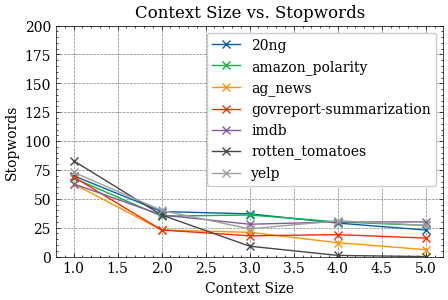

In [14]:
plt.figure(figsize=(5, 3))
plt.plot([1, 2, 3, 4, 5], semantic_stopwordsd1, marker='x', label="20ng")
plt.plot([1, 2, 3, 4, 5], semantic_stopwordsd2, marker='x', label="amazon_polarity")
plt.plot([1, 2, 3, 4, 5], semantic_stopwordsd3, marker='x', label="ag_news")
plt.plot([1, 2, 3, 4, 5], semantic_stopwordsd4, marker='x', label="govreport-summarization")
plt.plot([1, 2, 3, 4, 5], semantic_stopwordsd5, marker='x', label="imdb")
plt.plot([1, 2, 3, 4, 5], semantic_stopwordsd6, marker='x', label="rotten_tomatoes")
plt.plot([1, 2, 3, 4, 5], semantic_stopwordsd7, marker='x', label="yelp")
plt.legend()
plt.xlabel("Context Size")
plt.ylabel("Stopwords")
plt.title("Context Size vs. Stopwords")
plt.ylim(0, 200)
plt.savefig("figures/csvsstop.pdf")
plt.show()

In [15]:
semantic_stopwordssymmetric = []
semantic_stopwordsasymmetric = []
for data in data_list:
    for type in types:
        path = lm_path + data + '/lm/' + type + "/" + '5' + "/" + "not_preprocessed/"
        syntax_words = pickle.load(open(path + "syntax_words_top_5.pkl", "rb"))
        content_words = pickle.load(open(path + "content_words_top_5.pkl", "rb"))
        total_stopwords = []
        for word in content_words:
            if word in stopwords:
                total_stopwords.append(word)
        if type == "symmetric":
            semantic_stopwordssymmetric.append(len(total_stopwords))
        else:
            semantic_stopwordsasymmetric.append(len(total_stopwords))

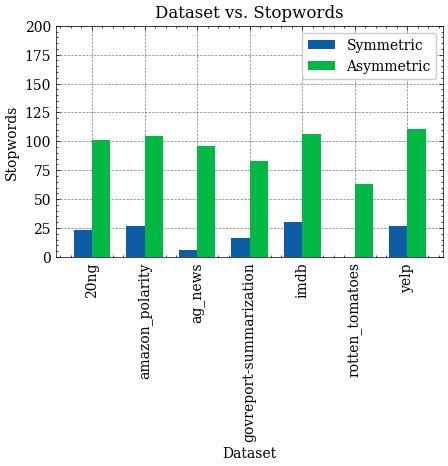

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))
width = 0.35
total_bars = np.arange(len(data_list))
symmetric_bars = [i - width/2 for i in total_bars]
asymmetric_bars = [i + width/2 for i in total_bars]
ax.bar(symmetric_bars, semantic_stopwordssymmetric, width, label="Symmetric")
ax.bar(asymmetric_bars, semantic_stopwordsasymmetric, width, label="Asymmetric")
ax.set_xticks(total_bars)
ax.set_xticklabels(data_list, rotation=90)
ax.set_xlabel("Dataset")
ax.set_ylabel("Stopwords")
ax.set_title("Dataset vs. Stopwords")
ax.set_ylim(0, 200)
ax.legend()
fig.savefig("figures/ctvsstop.pdf")



In [17]:
p_threshold = [0.1, 0.3, 0.5]
semantic_stopwordsp1= []
semantic_stopwordsp2 = []
semantic_stopwordsp3 = []
for data in data_list:
    for p in p_threshold:
        path = lm_path + data + '/lm/' + 'symmetric' + "/" + '5' + "/" + "not_preprocessed/"
        syntax_words = pickle.load(open(path + f"syntax_words_threshold_{p}.pkl", "rb"))
        content_words = pickle.load(open(path + f"content_words_threshold_{p}.pkl", "rb"))
        total_stopwords = []
        for word in content_words:
            if word in stopwords:
                total_stopwords.append(word)
        if p == 0.1:
            semantic_stopwordsp1.append(len(total_stopwords))
        elif p == 0.3:
            semantic_stopwordsp2.append(len(total_stopwords))
        else:
            semantic_stopwordsp3.append(len(total_stopwords))

In [18]:
top_n = [1, 3, 5]
semantic_stopwordst1= []
semantic_stopwordst3 = []
semantic_stopwordst5 = []

for data in data_list:
    for t in top_n:
        path = lm_path + data + '/lm/' + 'symmetric' + "/" + '5' + "/" + "not_preprocessed/"
        syntax_words = pickle.load(open(path + f"syntax_words_top_{t}.pkl", "rb"))
        content_words = pickle.load(open(path + f"content_words_top_{t}.pkl", "rb"))
        total_stopwords = []
        for word in content_words:
            if word in stopwords:
                total_stopwords.append(word)
        if t == 1:
            semantic_stopwordst1.append(len(total_stopwords))
        elif t == 3:
            semantic_stopwordst3.append(len(total_stopwords))
        else:
            semantic_stopwordst5.append(len(total_stopwords))

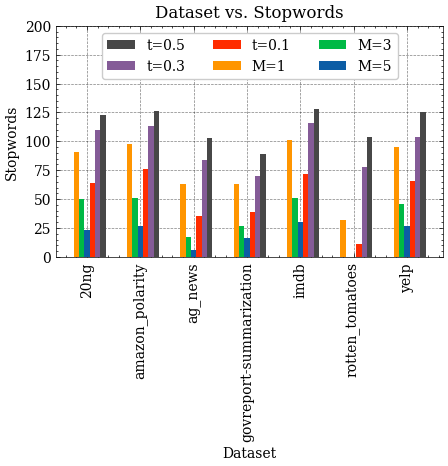

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
width = 0.1
total_bars = np.arange(len(data_list))
t1_bars = [i - width*2 for i in total_bars]
t3_bars = [i - width for i in total_bars]
t5_bars = [i for i in total_bars]
p1_bars = [i + width for i in total_bars]
p2_bars = [i + width*2 for i in total_bars]
p3_bars = [i + width*3 for i in total_bars]

ax.bar(t5_bars, semantic_stopwordst5, width, label="M=5")
ax.bar(t3_bars, semantic_stopwordst3, width, label="M=3")
ax.bar(t1_bars, semantic_stopwordst1, width, label="M=1")
ax.bar(p1_bars, semantic_stopwordsp1, width, label="t=0.1")
ax.bar(p2_bars, semantic_stopwordsp2, width, label="t=0.3")
ax.bar(p3_bars, semantic_stopwordsp3, width, label="t=0.5")
ax.set_xticks(total_bars)
ax.set_xticklabels(data_list, rotation=90)
ax.set_xlabel("Dataset")
ax.set_ylabel("Stopwords")
ax.set_title("Dataset vs. Stopwords")
ax.set_ylim(0, 200)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)
fig.savefig("figures/dmvsstop.pdf")